# Text Retrieval

- Step 1: Convert texts to vectors (Text Embedding)
- Step 2: Measure similarity

In [1]:
import numpy as np
import re
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

### 1.1 BOW
It’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear.

In [2]:
def clean_text(sentence):
    return re.sub("[^\w]", " ",  sentence.strip().lower()).split()


def tokenize(sentences):
    words = []
    for sentence in sentences:
        w = clean_text(sentence)
        words.extend(w)

    words = sorted(list(set(words)))
    return words


corpus = [
    'Tôi đi học',
    'Hôm nay, tôi đi học và tôi thấy rất vui',
    'Shopee sàn thương mại điện tử rất lớn việt nam',
    'Shopee và Lazada là hai người bạn thân',
    'con bò đực ăn cỏ',
    'con bò cái ăn cỏ và uống nước',
]

In [3]:
clean_text(corpus[0])

['tôi', 'đi', 'học']

In [4]:
vocab = tokenize(corpus)
print(f"Vocabulary Tokenize: \n{vocab} \n")

for sentence in corpus:
    words = clean_text(sentence)
    bag_vector = np.zeros(len(vocab)) # init with all zeros
    for w in words:
        for i, word in enumerate(vocab):
            if word == w:
                bag_vector[i] += 1
                print(bag_vector, word)

    print(f"\n{sentence} \n{bag_vector}\n")

Vocabulary Tokenize: 
['bò', 'bạn', 'con', 'cái', 'cỏ', 'hai', 'hôm', 'học', 'lazada', 'là', 'lớn', 'mại', 'nam', 'nay', 'người', 'nước', 'rất', 'shopee', 'sàn', 'thân', 'thương', 'thấy', 'tôi', 'tử', 'uống', 'việt', 'vui', 'và', 'ăn', 'đi', 'điện', 'đực'] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] tôi
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.] đi
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.] học

Tôi đi học 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] hôm
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] nay
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] tôi
[0. 0. 0. 0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 2 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]]


**Limitations of BOW**
- Semantic meaning: the basic BOW approach does not consider the meaning of the word in the document
- Vector size: For a large document, the vector size can be huge resulting in a lot of computation and time

Text(0.5, 1.0, 'Cosine Similarity by BOW')

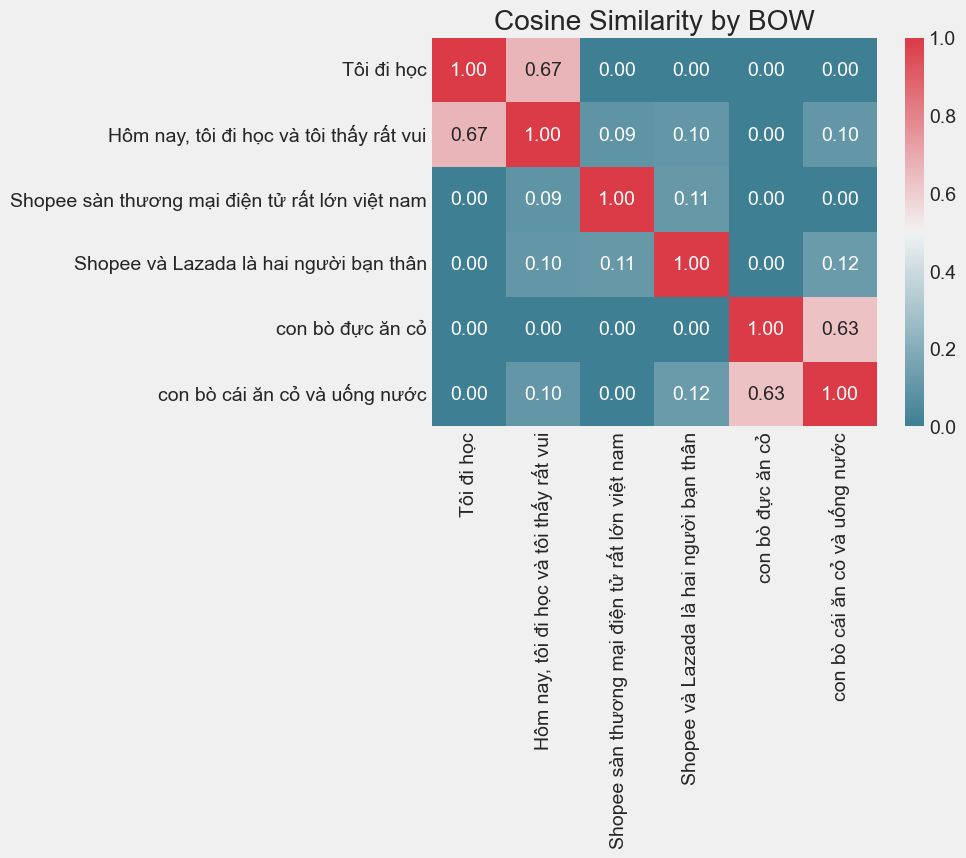

In [6]:
similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix, columns=corpus, index=corpus)

ax = sns.heatmap(similarity_df, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by BOW')

### 1.2 TF-IDF

Text(0.5, 1.0, 'Cosine Similarity by TF-IDF')

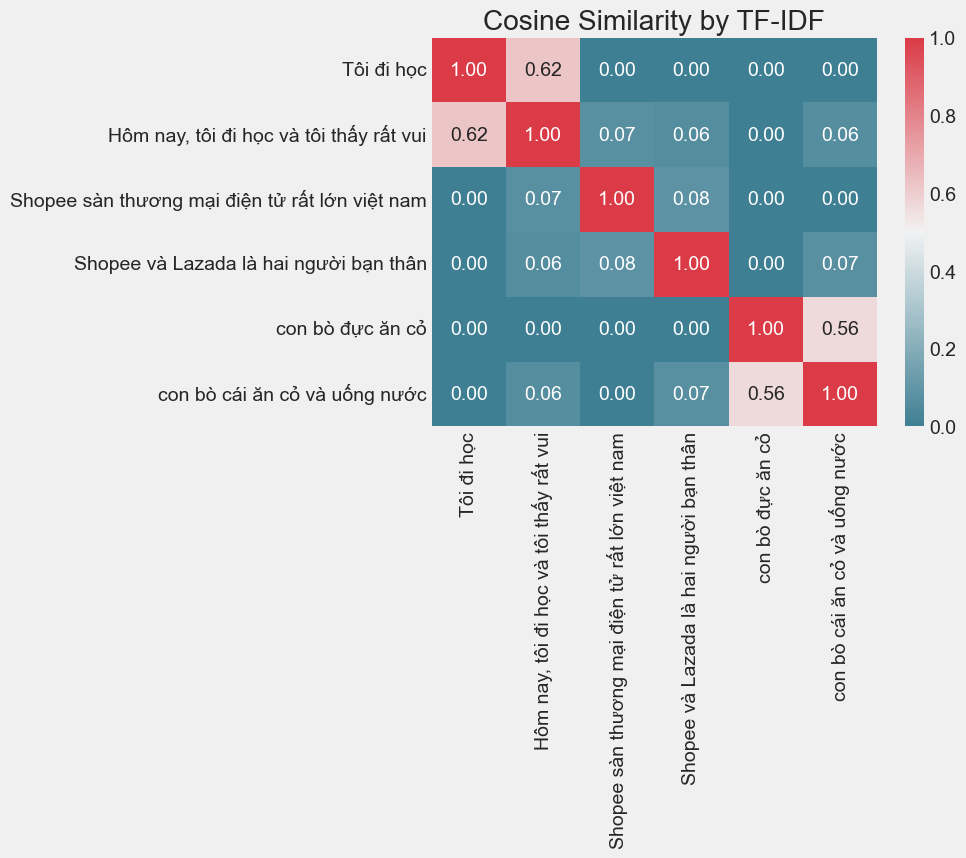

In [7]:
vectorizer = TfidfVectorizer()
maxtrix_base = vectorizer.fit_transform(corpus)

similarity_matrix_tfidf = cosine_similarity(maxtrix_base.toarray())
similarity_df_tfidf = pd.DataFrame(similarity_matrix_tfidf, columns=corpus, index=corpus)
ax = sns.heatmap(similarity_df_tfidf, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by TF-IDF')

### 1.3 PhoBERT

For BERT base, this will be a vector containing 768 - our numerical representation of a single token.
Because there is one of these vectors for representing each token, we are actually looking at a tensor of size 768 by the number of tokens. We can take these tensors — and transform them to create semantic representations of the input sequence. We can then take our similarity metrics and calculate the respective similarity between different sequences.

The simplest and most commonly extracted tensor is the `last_hidden_state` tensor.

In [8]:
from underthesea import text_normalize, word_tokenize
from transformers import AutoTokenizer, AutoModel
import torch


# processing for Vietnamese
corpus_token = [word_tokenize(text_normalize(sen.lower()), format="text") for sen in corpus]
corpus_token

['tôi đi học',
 'hôm_nay , tôi đi học và tôi thấy rất vui',
 'shopee sàn thương_mại_điện_tử rất lớn việt nam',
 'shopee và lazada là hai người bạn thân',
 'con bò đực ăn_cỏ',
 'con bò cái ăn_cỏ và uống nước']

In [9]:
pretrain_name = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(pretrain_name)
model = AutoModel.from_pretrained(pretrain_name)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
tokens = {'input_ids': [], 'attention_mask': []}

for sentence in corpus_token:
    new_tokens = tokenizer.encode_plus(sentence, max_length=128,
                                       truncation=True, padding='max_length',
                                       return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

# reformat list of tensors into single tensor
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

In [11]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [12]:
embeddings = outputs.last_hidden_state
embeddings

tensor([[[ 0.2215,  0.5438, -0.1556,  ..., -0.1815,  0.1675, -0.5616],
         [-0.2020, -0.0543, -0.0551,  ..., -0.1065, -0.5329,  0.4349],
         [ 0.0164, -0.2984,  0.1102,  ..., -0.3556, -0.2032,  0.0612],
         ...,
         [ 0.2223,  0.4698,  0.0179,  ..., -0.0222,  0.1258, -0.5033],
         [ 0.2223,  0.4698,  0.0179,  ..., -0.0222,  0.1258, -0.5033],
         [ 0.2223,  0.4698,  0.0179,  ..., -0.0222,  0.1258, -0.5033]],

        [[ 0.6185,  0.0142, -0.3389,  ..., -0.2867, -0.0102,  0.2659],
         [ 0.0895, -0.4076, -0.4039,  ..., -0.2048, -0.1459,  0.7839],
         [ 0.0197,  0.1840,  0.4803,  ...,  0.3444, -0.2215,  0.7057],
         ...,
         [-0.4016,  0.4857,  0.1999,  ..., -0.0814, -0.2300,  0.3027],
         [-0.4016,  0.4857,  0.1999,  ..., -0.0814, -0.2300,  0.3027],
         [-0.4016,  0.4857,  0.1999,  ..., -0.0814, -0.2300,  0.3027]],

        [[ 0.6606,  0.5407, -0.2048,  ..., -0.2010,  0.1703, -0.2222],
         [ 0.2682, -0.1940,  0.0962,  ..., -0

After we have produced our dense vectors embeddings, we need to perform a mean pooling operation to create a single vector encoding (the sentence embedding).
To do this mean pooling operation, we will need to multiply each value in our embeddings tensor by its respective attention_mask value — so that we ignore non-real tokens.

Each vector above represents a single token attention mask - each token now has a vector of size 768 representing it's attention_mask status. Then we multiply the two tensors to apply the attention mask:

In [13]:
# multiply attention mask
attention_mask = tokens['attention_mask']
print(f'attention mask: {attention_mask.shape}')
mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
print(f'mask: {mask.shape}')

masked_embeddings = embeddings * mask
print(f'mask embeddings: {masked_embeddings.shape}')

# sum the remained of the embeddings along axis 1
summed = torch.sum(masked_embeddings, 1)
# sum the number of values that must be given attention in each position of the tensor:
summed_mask = torch.clamp(mask.sum(1), min=1e-9)

mean_pooled = summed / summed_mask
mean_pooled = mean_pooled.detach().numpy()
print(f'mean_pooled: {mean_pooled.shape}')

attention mask: torch.Size([6, 128])
mask: torch.Size([6, 128, 768])
mask embeddings: torch.Size([6, 128, 768])
mean_pooled: (6, 768)


Text(0.5, 1.0, 'Cosine Similarity by PhoBERT')

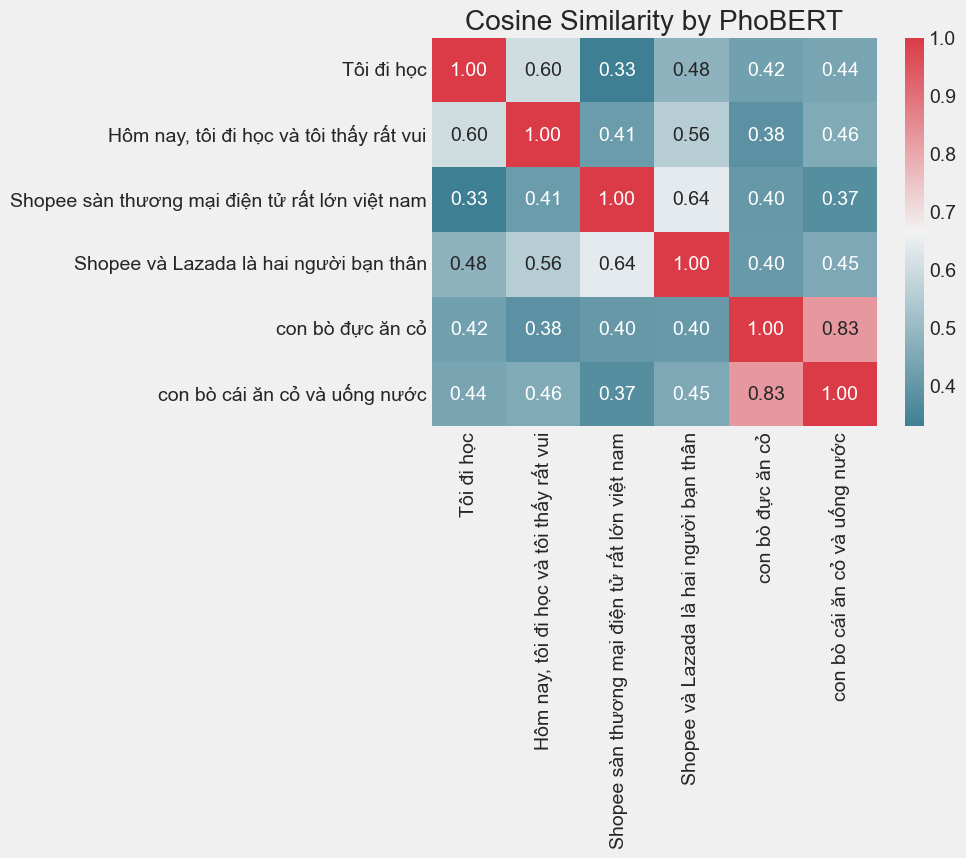

In [14]:
similarity_matrix = cosine_similarity(mean_pooled)
similarity_df = pd.DataFrame(similarity_matrix, columns=corpus, index=corpus)
ax = sns.heatmap(similarity_df, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by PhoBERT')

### 1.4 PhoBERT - Easy Approach

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(pretrain_name)

No sentence-transformers model found with name C:\Users\Kevin/.cache\torch\sentence_transformers\vinai_phobert-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\Kevin/.cache\torch\sentence_transformers\vinai_phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure th

Text(0.5, 1.0, 'Cosine Similarity by PhoBERT')

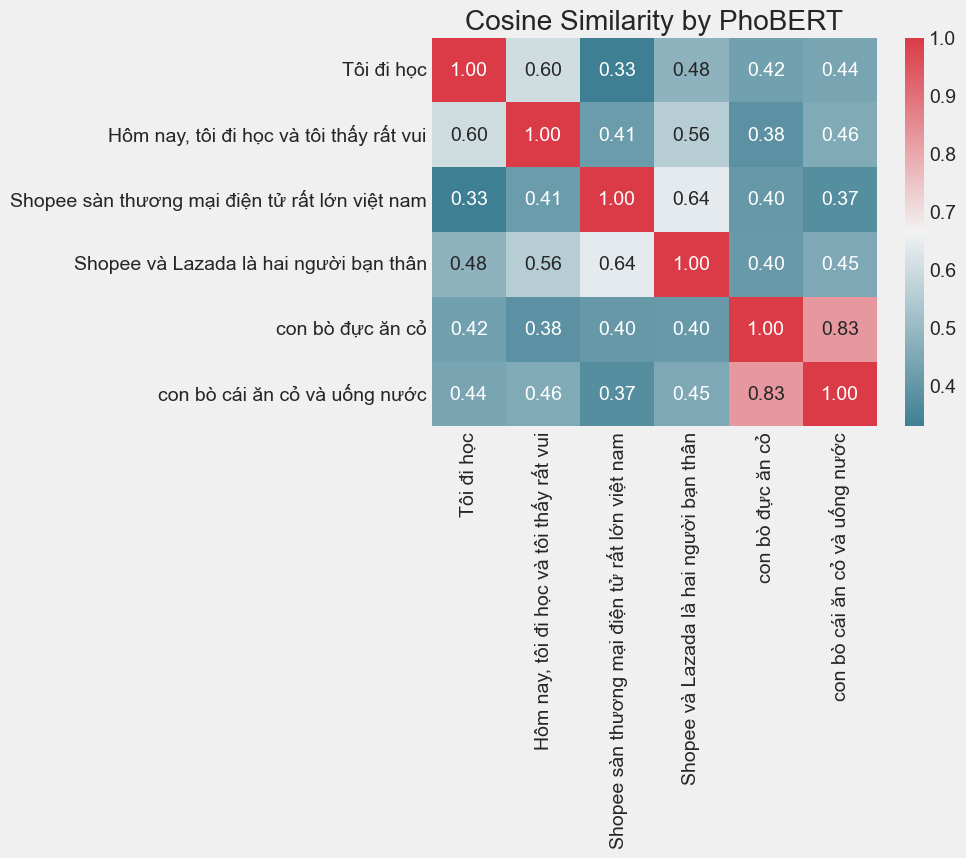

In [16]:
sentence_embeddings = model.encode(corpus_token)

similarity_matrix = cosine_similarity(sentence_embeddings)
similarity_df = pd.DataFrame(similarity_matrix, columns=corpus, index=corpus)
ax = sns.heatmap(similarity_df, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by PhoBERT')

### 1.5 BARTPho

In [17]:
from sentence_transformers import SentenceTransformer

pretrain_name = 'vinai/bartpho-syllable'
model = SentenceTransformer(pretrain_name)

No sentence-transformers model found with name C:\Users\Kevin/.cache\torch\sentence_transformers\vinai_bartpho-syllable. Creating a new one with MEAN pooling.


Text(0.5, 1.0, 'Cosine Similarity by PhoBART')

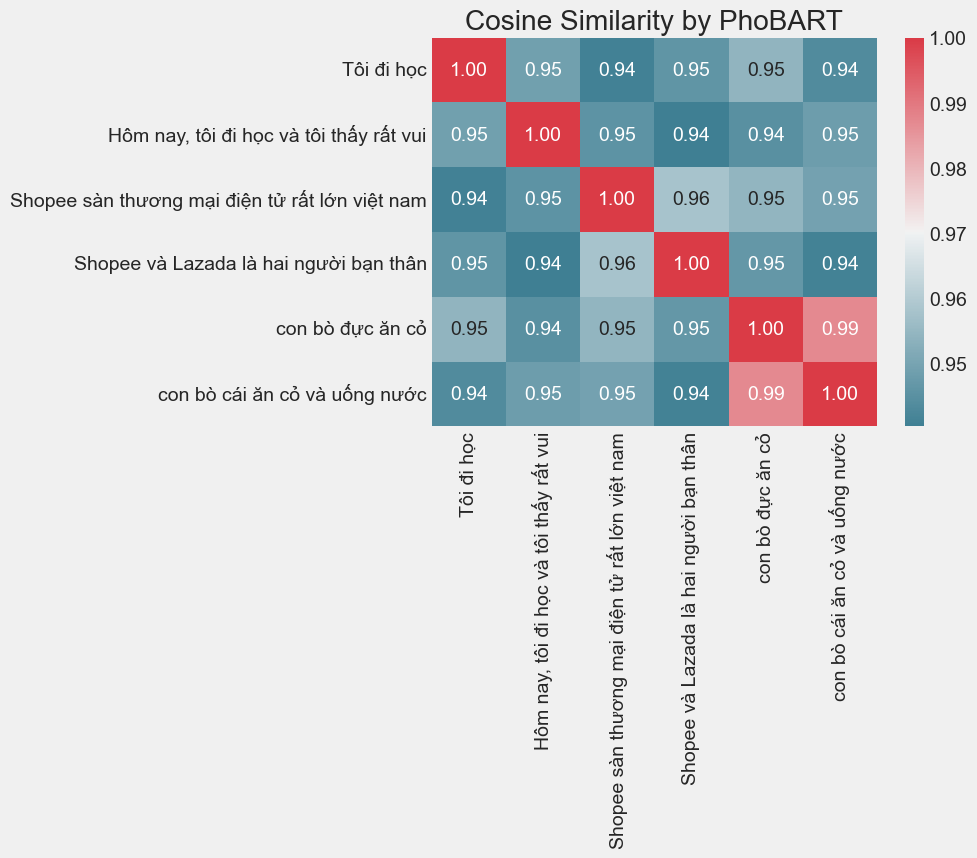

In [18]:
bart_embeddings = model.encode(corpus)

similarity_matrix = cosine_similarity(bart_embeddings)
similarity_df = pd.DataFrame(similarity_matrix, columns=corpus, index=corpus)
ax = sns.heatmap(similarity_df, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by PhoBART')